In [2]:
import numpy as np
import kaggle
import timeit

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file


# Read in train and test data

def read_data_fb():
	print('Reading facebook dataset ...')
	train_x = np.loadtxt('../../Data/data.csv', delimiter=',')
	train_y = np.loadtxt('../../Data/labels.csv', delimiter=',')
	train_kaggle = np.loadtxt('../../Data/kaggle_data.csv', delimiter=',')

	return (train_x, train_y, train_kaggle)

# Compute MAE
def compute_error(y_hat, y):
	# mean absolute error
	return np.abs(y_hat - y).mean()

############################################################################

train_x, train_y, kaggle_x   = read_data_fb()
print('Train=', train_x.shape)
print('Kaggle=', kaggle_x.shape)



######### normalizing features to speed up SVM, we shouldn't normalize outputs
from sklearn.preprocessing import StandardScaler

train_x2=StandardScaler().fit_transform(train_x)
kaggle_x2=StandardScaler().fit_transform(kaggle_x)


Reading facebook dataset ...
Train= (30712, 52)
Kaggle= (10237, 52)


In [6]:
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

######### normalizing features to speed up SVM, we shouldn't normalize outputs
train_x2=StandardScaler().fit_transform(train_x)
kaggle_x2=StandardScaler().fit_transform(kaggle_x)

mysvr = SVR(kernel='poly') 
p_grid = {'degree':[1,2]}
bestsvr1 = GridSearchCV(estimator=mysvr, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestsvr1.fit(train_x2,train_y)
print("Done with CV on Polynomial SVM")

Done with CV on SVM


In [7]:
print('out of sample errors for polynomial SVM:', abs(bestsvr1.cv_results_['mean_test_score']))
print('degree of the polynomial', [1,2])


out of sample errors for polynomial SVM: [ 5.45863541  6.02130429]
degree of the polynomial [1, 2]


In [10]:
mysvr2 = SVR()
p_grid = {'kernel': ['rbf']}
bestsvr2 = GridSearchCV(estimator=mysvr2, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestsvr2.fit(train_x2,train_y)
print("Done with CV on RBF SVM")
print('out of sample errors for RBF SVM:', abs(bestsvr2.cv_results_['mean_test_score']))


Done with CV on RBF SVM
out of sample errors for RBF SVM: [ 5.76267034]


In [42]:
# This cell does the same thing as the above cell

from sklearn.model_selection import cross_val_score

svr3 = SVR(kernel='rbf')
scores = cross_val_score(svr3, train_x2, train_y, cv=5,scoring='neg_mean_absolute_error')
print("Done with CV on RBF SVM")
print('out of sample errors for RBF SVM:', abs((scores.mean())))
print('scores',scores)


Done with CV on RBF SVM
out of sample errors for RBF SVM: 5.76265710611
scores [-5.50482684 -6.42699884 -5.44142722 -6.36426978 -5.07576285]


In [16]:
bestsvr=SVR(kernel='poly',degree=1)
bestsvr.fit(train_x2,train_y)
predicted_y=bestsvr.predict(kaggle_x2)
file_name = '../Predictions/bestsvr.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/bestsvr.csv
Done with writing.


In [ ]:

mysvr = SVR(kernel='poly') 
p_grid = {'degree':[1,3,4,5]}
bestsvr1 = GridSearchCV(estimator=mysvr, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestsvr1.fit(train_x2,train_y)
print("Done with CV on Polynomial SVM")
print('out of sample errors for polynomial SVM:', abs(bestsvr1.cv_results_['mean_test_score']))
print('degree of the polynomial', [1,3,4,5])


In [33]:
### Question 5
from sklearn.neural_network import MLPRegressor
mynn=MLPRegressor(max_iter=400)
p_grid = {'hidden_layer_sizes':[(10,),(20,),(30,),(40,)]}
#p_grid = {'hidden_layer_sizes':[(20,)]}
bestnn = GridSearchCV(estimator=mynn, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestnn.fit(train_x2,train_y)
print("Done with CV on NN")

Done with CV on NN


In [34]:
bestnn.best_params_

{'hidden_layer_sizes': (10,)}

In [35]:
print('out of sample errors for NN', abs(bestnn.cv_results_['mean_test_score']))
print('number of neurons in the single hidden layer:', [10,20,30,40])


out of sample errors for NN [ 6.6604514   7.22658936  7.21928379  7.16788212]
number of neurons in the single hidden layer: [10, 20, 30, 40]


In [36]:
bestnn.fit(train_x2,train_y)
predicted_y=bestnn.predict(kaggle_x2)
file_name = '../Predictions/bestnn.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/bestnn.csv
Done with writing.


In [22]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

mytree = tree.DecisionTreeRegressor()
p_grid = {'max_depth':[4,6,8,10,12],'min_samples_split' :[2,3,4]}
besttree = GridSearchCV(estimator=mytree, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
besttree.fit(train_x2,train_y)
print('out of sample errors:', abs(besttree.cv_results_['mean_test_score']))
print('max depth:', [3,6,9])
print('Error from CV:',(besttree.cv_results_['mean_test_score'].max())*(-1))
#predicted_y=besttree.predict(kaggle_x2)
#file_name = '../Predictions/bestbest.csv'
#kaggle.kaggleize(predicted_y, file_name)
#print('Done with writing.')

out of sample errors: [ 5.42975997  5.42975997  5.42975997  4.96189596  4.92476486  4.90516589
  4.95768042  4.9232807   4.8759661   5.0742309   5.02391522  5.07945346
  5.12638377  5.16033442  5.21296676]
max depth: [3, 6, 9]
Error from CV: 4.87596610142


In [23]:
predicted_y=besttree.predict(kaggle_x2)
file_name = '../Predictions/bestbest.csv'
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Done with writing.


In [26]:
from sklearn.svm import LinearSVR
myregr = LinearSVR()
p_grid = {'random_state':[0]}
bestsv = GridSearchCV(estimator=myregr, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestsv.fit(train_x2,train_y)
print('out of sample errors:', abs(bestsv.cv_results_['mean_test_score']))
#predicted_y=besttree.predict(kaggle_x2)
#file_name = '../Predictions/bestbest.csv'
#kaggle.kaggleize(predicted_y, file_name)
#print('Done with writing.')


out of sample errors: [ 5.44213487]


In [29]:

predicted_y=besttree.predict(kaggle_x2)
file_name = '../Predictions/bestbest.csv'
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Done with writing.


In [30]:
from sklearn.svm import SVR
bestsvr=SVR(kernel='poly',degree=1)
bestsvr.fit(train_x2,train_y)
#predicted_y=bestsvr.predict(kaggle_x2)
#file_name = '../Predictions/bestbest.csv'
# Writing output in Kaggle format
#print('Writing output to ', file_name)
#kaggle.kaggleize(predicted_y, file_name)
#print('Done with writing.')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
al=bestsvr.predict(train_x2)
al.mean()

3.816890637773882

In [72]:
compute_error(al.clip(min=0), train_y)

5.4260660692995613

In [69]:
predicted_y=bestsvr.predict(kaggle_x2)
predicted_y=predicted_y.clip(min=0)
file_name = '../Predictions/bestbest.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/bestbest.csv
Done with writing.


In [74]:
train_y.max()

1305.0

In [75]:
al.max()

334.56982304752671

In [76]:
predicted_y.max()

433.5991448456964

In [77]:
train_y.mean()

7.435855691586351

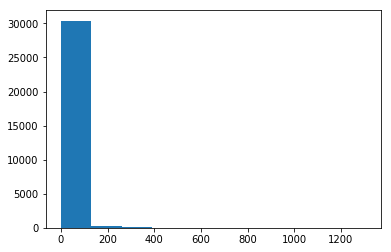

In [85]:
import matplotlib.pyplot as plt
plt.hist(train_y)
plt.show()


In [93]:
2+2

4

In [133]:

############# This found the best output
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(100, input_shape=(52,)),
    Activation('softmax'),
    Dense(40),
    Activation('sigmoid'),
    Dense(1),
    Activation('relu')
])

model.compile(optimizer='sgd',
              loss='mean_absolute_error')

model.fit(train_x2, train_y, epochs=200, batch_size=52)

Epoch 1/200
30712/30712 [==============================] - 2s 55us/step - loss: 7.4359
Epoch 2/200
30712/30712 [==============================] - 1s 45us/step - loss: 7.4359
Epoch 3/200
30712/30712 [==============================] - 1s 45us/step - loss: 7.4359
Epoch 4/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 5/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 6/200
30712/30712 [==============================] - 1s 45us/step - loss: 7.4359
Epoch 7/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 8/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 9/200
30712/30712 [==============================] - 1s 47us/step - loss: 7.4359
Epoch 10/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 11/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 12/200
30712/30712 [===============

30712/30712 [==============================] - 1s 38us/step - loss: 7.4359
Epoch 95/200
30712/30712 [==============================] - 1s 37us/step - loss: 7.4359
Epoch 96/200
30712/30712 [==============================] - 1s 41us/step - loss: 7.4359
Epoch 97/200
30712/30712 [==============================] - 1s 41us/step - loss: 7.4359
Epoch 98/200
30712/30712 [==============================] - 1s 41us/step - loss: 7.4359
Epoch 99/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359
Epoch 100/200
30712/30712 [==============================] - 1s 41us/step - loss: 7.4359
Epoch 101/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359
Epoch 102/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359
Epoch 103/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359
Epoch 104/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359
Epoch 105/200
30712/30712 [=============

30712/30712 [==============================] - 1s 47us/step - loss: 7.4359
Epoch 186/200
30712/30712 [==============================] - 1s 46us/step - loss: 7.4359: 0s - l
Epoch 187/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359
Epoch 188/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 189/200
30712/30712 [==============================] - 1s 44us/step - loss: 7.4359
Epoch 190/200
30712/30712 [==============================] - 1s 42us/step - loss: 7.4359: 0s - loss: 7
Epoch 191/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359
Epoch 192/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359: 0s - loss
Epoch 193/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359
Epoch 194/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359
Epoch 195/200
30712/30712 [==============================] - 1s 43us/step - loss: 7.4359
Ep

In [134]:
predicted_y=model.predict(kaggle_x2)
predicted_y=predicted_y.clip(min=0)
file_name = '../Predictions/bestbest.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/bestbest.csv
Done with writing.


In [122]:
### Question 6
from sklearn.neural_network import MLPRegressor
mynnk=MLPRegressor(max_iter=400)
p_grid = {'hidden_layer_sizes':[(40,60,80,100),(10,20,30,40)]}
bestnnk = GridSearchCV(estimator=mynnk, param_grid=p_grid, cv=10,return_train_score=True,scoring='neg_mean_absolute_error')
bestnnk.fit(train_x2,train_y)
print("Done with CV on NN")

SyntaxError: invalid syntax (<ipython-input-122-9ed1335c162b>, line 4)

In [ ]:
print(bestnn.best_params_)
bestnnk.fit(train_x2,train_y)
predicted_y=bestnnk.predict(kaggle_x2)
predicted_y=predicted_y.clip(min=0)
file_name = '../Predictions/bestnn.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

In [123]:
[(1:2),(2:3)]


SyntaxError: invalid syntax (<ipython-input-123-efff9d70dff8>, line 1)

In [128]:
a=[(1,2),(2,3)]


SyntaxError: invalid syntax (<ipython-input-128-a8a0d2465165>, line 2)

In [129]:
[1:2]


SyntaxError: invalid syntax (<ipython-input-129-0f96395e9759>, line 1)

In [132]:
(1:1:3)


SyntaxError: invalid syntax (<ipython-input-132-973377ee365f>, line 1)